<a href="https://colab.research.google.com/github/vamsigp/EIP-4/blob/master/wk_3/S3_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.layers import SeparableConv2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [6]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 7s 0us/step


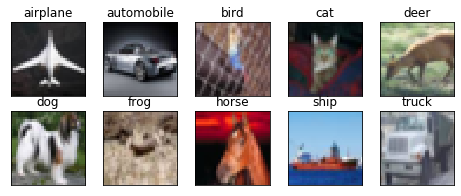

In [7]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [11]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 23s 58ms/step - loss: 1.8533 - acc: 0.2917 - val_loss: 1.4024 - val_acc: 0.4753
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3771 - acc: 0.5007 - val_loss: 1.1982 - val_acc: 0.5733
Epoch 3/50
390/390 [==============================] - 20s 53ms/step - loss: 1.1564 - acc: 0.5899 - val_loss: 0.9679 - val_acc: 0.6635
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0181 - acc: 0.6418 - val_loss: 0.9144 - val_acc: 0.6827
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9120 - acc: 0.6849 - val_loss: 0.8020 - val_acc: 0.7192
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8338 - acc: 0.7132 - val_loss: 0.7739 - val_acc: 0.7345
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7744 - acc: 0.7367 - val_loss: 0.7027 - val_acc: 0.7622
Epoch 8/50
390/390 [==============================] - 21s 53ms

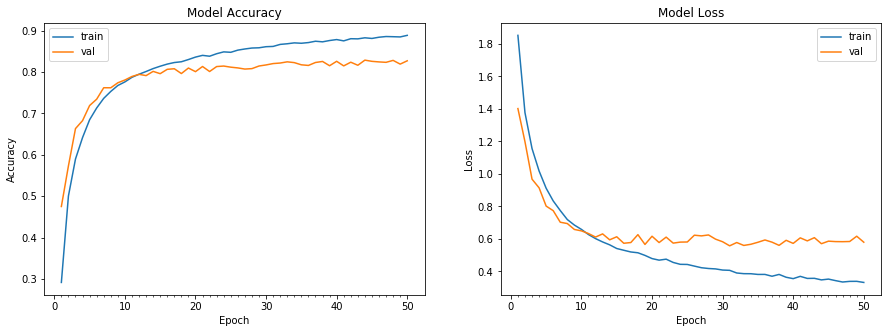

Accuracy on test data is: 82.73


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def train_model(current_model):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                  validation_data = (test_features, test_labels), verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))

In [0]:
def train_modelWithScheduler(current_model):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)],
                                   verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))

In [0]:
def trainModelWithCallbacks(current_model, myCallbacks):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                validation_data = (test_features, test_labels),callbacks=[myCallbacks],
                                   verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))  

### Assignment

1. it uses depthwise separable convolution ONLY (no Conv2D)
2. it uses BatchNormalization 
3. < 100000 parameters
4. Proper dropout values
5. Mention for each layer

    a. Receptive Field

    b. Indented block

    c. output size
6. runs for 50 epochs
7. Beat the base model accuracy which is 83.05%



### Trail - 8

FRom the Trail-7, at the end of 50th epoch we can see the accuracy is hitting 82%, if we can run for few more iterations it may reach to base model accuracy.

Also, we need to observe the Learning rate is decreasing very slowly. My intuition is as the LR is very low, its not achieving the convergence. Lets apply minimum LR by use of ReduceLROnPlateau callback.

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode= 'min', patience=4, min_lr=0.0001, verbose=1)

In [0]:
m8 = Sequential()

# Block 1
m8.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(MaxPooling2D(pool_size=2)) #15
m8.add(Dropout(0.25))

# Block 2
m8.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(MaxPooling2D(pool_size=2)) # 6
m8.add(Dropout(0.25))

# block 3
m8.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m8.add(Activation('relu'))
m8.add(BatchNormalization())
m8.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m8.add(Activation('relu'))
m8.add(BatchNormalization())
m8.add(MaxPooling2D(pool_size=(2, 2))) #2
m8.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m8.add(Convolution2D(num_classes, 2))

m8.add(GlobalAveragePooling2D())
m8.add(Activation('softmax'))

m8.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy']) 

In [20]:
m8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':




Epoch 1/50
390/390 [==============================] - 32s 81ms/step - loss: 1.6475 - acc: 0.4337 - val_loss: 1.5447 - val_acc: 0.4890
Epoch 2/50
390/390 [==============================] - 26s 67ms/step - loss: 1.1663 - acc: 0.5855 - val_loss: 1.2318 - val_acc: 0.5680
Epoch 3/50
390/390 [==============================] - 26s 67ms/step - loss: 0.9738 - acc: 0.6572 - val_loss: 1.4433 - val_acc: 0.5554
Epoch 4/50
390/390 [==============================] - 26s 67ms/step - loss: 0.8698 - acc: 0.6957 - val_loss: 0.9754 - val_acc: 0.6712
Epoch 5/50
390/390 [==============================] - 26s 67ms/step - loss: 0.7981 - acc: 0.7202 - val_loss: 1.3397 - val_acc: 0.5745
Epoch 6/50
390/390 [==============================] - 26s 67ms/step - loss: 0.7481 - acc: 0.7386 - val_loss: 0.8830 - val_acc: 0.6960
Epoch 7/50
390/390 [==============================] - 26s 67ms/step - loss: 0.7046 - acc: 0.7519 - val_loss: 0.7853 - val_acc: 0.7328
Epoch 8/50
390/390 [==============================] - 26s 67

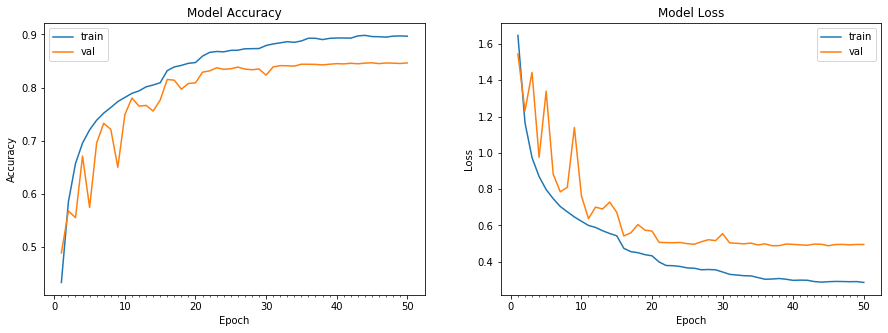

Accuracy on test data is: 84.62


In [21]:
trainModelWithCallbacks(m8, reduce_lr)

In [0]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

### Trail - 7

In [15]:
m7 = Sequential()

# Block 1
m7.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(MaxPooling2D(pool_size=2)) #15
m7.add(Dropout(0.25))

# Block 2
m7.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(MaxPooling2D(pool_size=2)) # 6
m7.add(Dropout(0.25))

# block 3
m7.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m7.add(Activation('relu'))
m7.add(BatchNormalization())
m7.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m7.add(Activation('relu'))
m7.add(BatchNormalization())
m7.add(MaxPooling2D(pool_size=(2, 2))) #2
m7.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m7.add(Convolution2D(num_classes, 2))

m7.add(GlobalAveragePooling2D())
m7.add(Activation('softmax'))

m7.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy']) 













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
m7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 31s 81ms/step - loss: 1.6635 - acc: 0.4308 - val_loss: 1.8127 - val_acc: 0.4312
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
390/390 [==============================] - 27s 70ms/step - loss: 1.1472 - acc: 0.5926 - val_loss: 1.3790 - val_acc: 0.5277
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
390/390 [==============================] - 27s 70ms/step - loss: 0.9865 - acc: 0.6506 - val_loss: 1.0419 - val_acc: 0.6337
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
390/390 [==============================] - 27s 70ms/step - loss: 0.8864 - acc: 0.6875 - val_loss: 0.8242 - val_acc: 0.7106
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013157895.
390/390 [==============================] - 27s 70ms/step - loss: 0.8105 - acc: 0.71

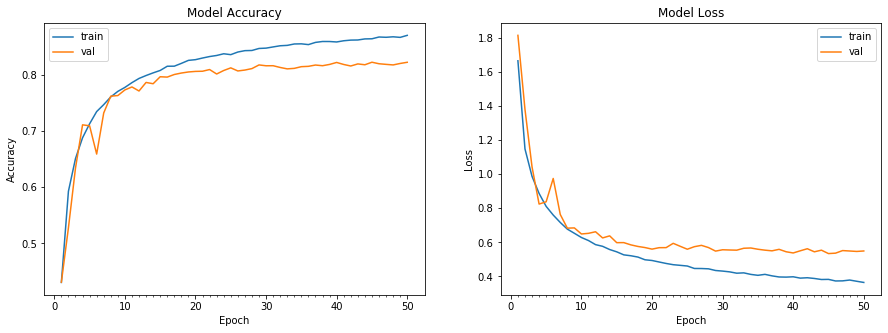

Accuracy on test data is: 82.17


In [17]:
train_modelWithScheduler(m7)

### Trail - 5
Trail- 3 with lower drop out values

In [0]:
m5 = Sequential()

# Block 1
m5.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D(pool_size=2)) #15
m5.add(Dropout(0.25))

# Block 2
m5.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D(pool_size=2)) # 6
m5.add(Dropout(0.25))

# block 3
m5.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m5.add(Activation('relu'))
m5.add(BatchNormalization())
m5.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m5.add(Activation('relu'))
m5.add(BatchNormalization())
m5.add(MaxPooling2D(pool_size=(2, 2))) #2
m5.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m5.add(Convolution2D(num_classes, 2))

m5.add(GlobalAveragePooling2D())
m5.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_49 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_53 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_50 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_48 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_54 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 48)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 32s 83ms/step - loss: 1.8350 - acc: 0.3830 - val_loss: 1.3799 - val_acc: 0.4996
Epoch 2/50
390/390 [==============================] - 28s 71ms/step - loss: 1.3385 - acc: 0.5270 - val_loss: 1.4482 - val_acc: 0.5231
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.1448 - acc: 0.5960 - val_loss: 1.4354 - val_acc: 0.5240
Epoch 4/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0198 - acc: 0.6411 - val_loss: 0.9622 - val_acc: 0.6617
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 0.9326 - acc: 0.6712 - val_loss: 0.9651 - val_acc: 0.6594
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8706 - acc: 0.6936 - val_loss: 0.9635 - val_acc: 0.6665
Epoch 7/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8220 - acc: 0.7110 - val_loss: 0.8340 - val_acc: 0.7055
Epoch 8/50
390/390 [==============================] - 28s 72ms

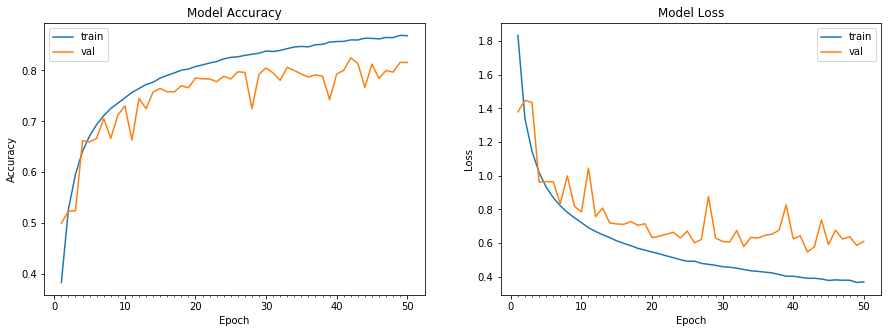

Accuracy on test data is: 81.57


In [0]:
train_model(m5)

### Trail - 4
Trail 2 and Trail 3 didnt reach the base network accuracy; 
Lets tweak the architecture number of filters and add more layers based on Trail-3

In [0]:
m4 = Sequential()

# Block 1
m4.add(SeparableConv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu', input_shape=(32, 32, 3))) # 32
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) # 32
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu')) # 30
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=2)) #15
m4.add(Dropout(0.1))

# Block 2
m4.add(SeparableConv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu')) # 15
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) # 15
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu')) # 13
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=2)) # 6
m4.add(Dropout(0.1))

# block 3
m4.add(SeparableConv2D(filters=32, kernel_size=(3, 3),padding='same', activation='relu')) #6
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) #6
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu')) #4
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=(2, 2))) #2
m4.add(Dropout(0.1))

# check if the below can be done using SeperableConv@D
m4.add(Convolution2D(num_classes, 2))

m4.add(GlobalAveragePooling2D())
m4.add(Activation('softmax'))

m4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_40 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_41 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_42 (Separab (None, 30, 30, 128)       8896      
_________________________________________________________________
batch_normalization_40 (Batc (None, 30, 30, 128)       512       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 44s 113ms/step - loss: 1.7439 - acc: 0.3836 - val_loss: 1.6012 - val_acc: 0.4507
Epoch 2/50
390/390 [==============================] - 38s 98ms/step - loss: 1.2546 - acc: 0.5482 - val_loss: 1.2237 - val_acc: 0.5744
Epoch 3/50
390/390 [==============================] - 38s 98ms/step - loss: 1.0390 - acc: 0.6311 - val_loss: 1.0267 - val_acc: 0.6332
Epoch 4/50
390/390 [==============================] - 38s 98ms/step - loss: 0.9100 - acc: 0.6784 - val_loss: 0.9453 - val_acc: 0.6714
Epoch 5/50
390/390 [==============================] - 38s 98ms/step - loss: 0.8226 - acc: 0.7107 - val_loss: 0.9148 - val_acc: 0.6794
Epoch 6/50
390/390 [==============================] - 38s 98ms/step - loss: 0.7639 - acc: 0.7302 - val_loss: 0.8145 - val_acc: 0.7165
Epoch 7/50
390/390 [==============================] - 38s 98ms/step - loss: 0.7063 - acc: 0.7508 - val_loss: 0.8374 - val_acc: 0.7154
Epoch 8/50
390/390 [==============================] - 38s 98m

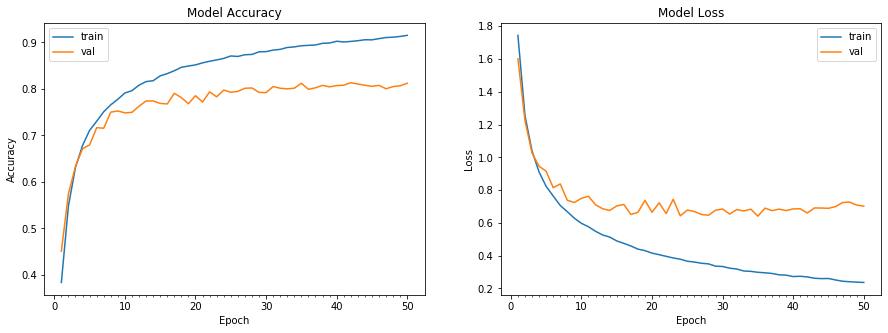

Accuracy on test data is: 81.21


In [0]:
train_model(m4)

### Trail - 3

In [0]:
m3 = Sequential()

# Block 1
m3.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(MaxPooling2D(pool_size=2)) #15
m3.add(Dropout(0.25))

# Block 2
m3.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(MaxPooling2D(pool_size=2)) # 6
m3.add(Dropout(0.25))

# block 3
m3.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m3.add(Activation('relu'))
m3.add(BatchNormalization())
m3.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m3.add(Activation('relu'))
m3.add(BatchNormalization())
m3.add(MaxPooling2D(pool_size=(2, 2))) #2
m3.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m3.add(Convolution2D(num_classes, 2))

m3.add(GlobalAveragePooling2D())
m3.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_32 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_33 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_32 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_46 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 32s 81ms/step - loss: 1.8464 - acc: 0.3762 - val_loss: 1.4038 - val_acc: 0.4967
Epoch 2/50
390/390 [==============================] - 26s 68ms/step - loss: 1.3199 - acc: 0.5319 - val_loss: 1.1858 - val_acc: 0.5722
Epoch 3/50
390/390 [==============================] - 27s 68ms/step - loss: 1.1253 - acc: 0.5995 - val_loss: 1.0407 - val_acc: 0.6345
Epoch 4/50
390/390 [==============================] - 27s 68ms/step - loss: 0.9975 - acc: 0.6484 - val_loss: 1.0849 - val_acc: 0.6296
Epoch 5/50
390/390 [==============================] - 27s 68ms/step - loss: 0.9214 - acc: 0.6771 - val_loss: 0.8649 - val_acc: 0.7008
Epoch 6/50
390/390 [==============================] - 27s 68ms/step - loss: 0.8589 - acc: 0.6971 - val_loss: 1.0204 - val_acc: 0.6618
Epoch 7/50
390/390 [==============================] - 27s 68ms/step - loss: 0.8103 - acc: 0.7129 - val_loss: 0.8937 - val_acc: 0.6958
Epoch 8/50
390/390 [==============================] - 27s 68ms

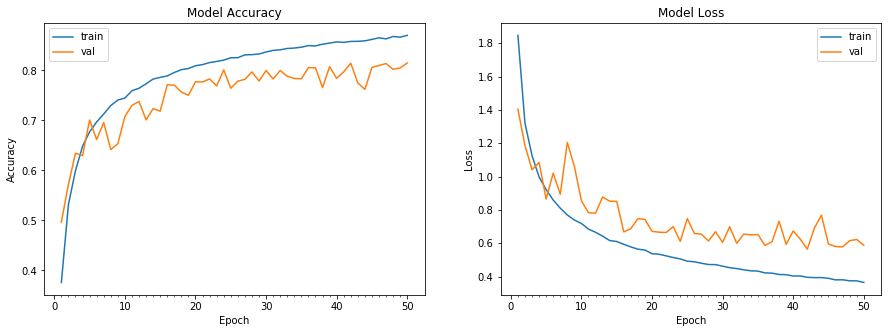

Accuracy on test data is: 81.49


In [0]:
train_model(m3)

### Trail - 2

Remove last layers of Dense and apply 1x1 conv

In [0]:
m2 = Sequential()

# Block 1
m2.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(MaxPooling2D(pool_size=2)) #15
m2.add(Dropout(0.25))

# Block 2
m2.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(MaxPooling2D(pool_size=2)) # 6
m2.add(Dropout(0.25))

# block 3
m2.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m2.add(Activation('relu'))
m2.add(BatchNormalization())
m2.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m2.add(Activation('relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(pool_size=(2, 2))) #2
m2.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m2.add(Convolution2D(num_classes, 2))

m2.add(Flatten())
m2.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_20 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_21 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_33 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 31s 79ms/step - loss: 1.8509 - acc: 0.3711 - val_loss: 1.4991 - val_acc: 0.4626
Epoch 2/50
390/390 [==============================] - 28s 72ms/step - loss: 1.3831 - acc: 0.5067 - val_loss: 1.4703 - val_acc: 0.4935
Epoch 3/50
390/390 [==============================] - 28s 73ms/step - loss: 1.1857 - acc: 0.5789 - val_loss: 1.1215 - val_acc: 0.6066
Epoch 4/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0589 - acc: 0.6228 - val_loss: 1.0055 - val_acc: 0.6496
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 0.9673 - acc: 0.6572 - val_loss: 0.9299 - val_acc: 0.6717
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8979 - acc: 0.6836 - val_loss: 0.9564 - val_acc: 0.6717
Epoch 7/50
390/390 [==============================] - 28s 73ms/step - loss: 0.8438 - acc: 0.7032 - val_loss: 0.9105 - val_acc: 0.6922
Epoch 8/50
390/390 [==============================] - 28s 72ms

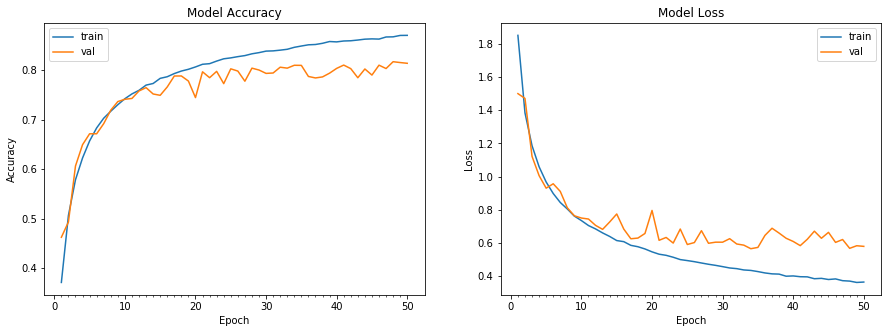

Accuracy on test data is: 81.41


In [0]:
train_model(m2)

### Trail - 1

---
Model name = ***m1***



*   Architecture same as Base model architecture
*   Replacing Conv2D with SeperaableConv2D
* *Not changing dropout values*
-- Result Model Not learning

* Add Batch Normalization after convolution



---



In [0]:
m1 = Sequential()

# Block 1
m1.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 30
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 28
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(MaxPooling2D(pool_size=2)) #14
m1.add(Dropout(0.25))

# Block 2
m1.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 12
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 10 
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))

# block 3
m1.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same'))
m1.add(Activation('relu'))
m1.add(BatchNormalization())
m1.add(SeparableConv2D(filters=192, kernel_size=(3, 3)))
m1.add(Activation('relu'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Dropout(0.25))

m1.add(Flatten())
m1.add(Dense(512))
m1.add(Activation('relu'))
m1.add(Dropout(0.5))
m1.add(Dense(256))
m1.add(Activation('relu'))
m1.add(Dropout(0.5))
m1.add(Dense(num_classes, activation='softmax'))

m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_8 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_9 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 30s 76ms/step - loss: 1.9044 - acc: 0.3035 - val_loss: 1.6357 - val_acc: 0.3992
Epoch 2/50
390/390 [==============================] - 28s 72ms/step - loss: 1.4837 - acc: 0.4707 - val_loss: 1.4270 - val_acc: 0.5000
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.2865 - acc: 0.5458 - val_loss: 1.1486 - val_acc: 0.6052
Epoch 4/50
390/390 [==============================] - 28s 71ms/step - loss: 1.1724 - acc: 0.5917 - val_loss: 1.0147 - val_acc: 0.6537
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0740 - acc: 0.6281 - val_loss: 1.0046 - val_acc: 0.6516
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0032 - acc: 0.6537 - val_loss: 0.9763 - val_acc: 0.6646
Epoch 7/50
390/390 [==============================] - 28s 72ms/step - loss: 0.9551 - acc: 0.6725 - val_loss: 0.9639 - val_acc: 0.6703
Epoch 8/50
390/390 [==============================] - 28s 72ms

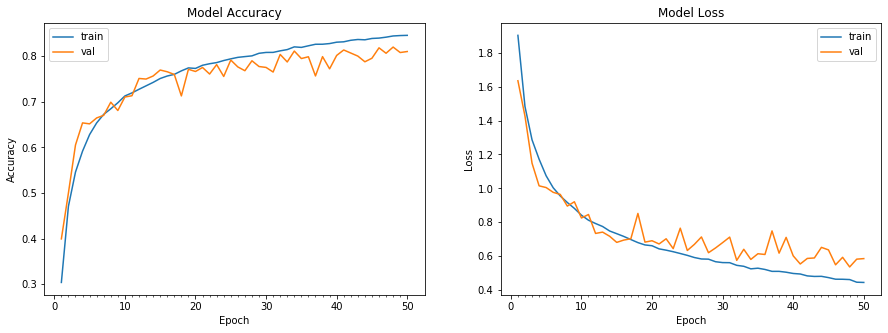

Accuracy on test data is: 81.03


In [0]:
train_model(m1)